In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import harness


In [4]:
flights_train = harness.read_flights('data/flights_train.csv')

In [5]:
flights_clean = harness.clean_train(flights_train)

### Airports

In [41]:
airports = harness.transfer_grouped_means(flights_clean, flights_clean, 100, 'origin', 'dest')

In [43]:
airports = airports[airports.has_origin__dest_mean > 0]

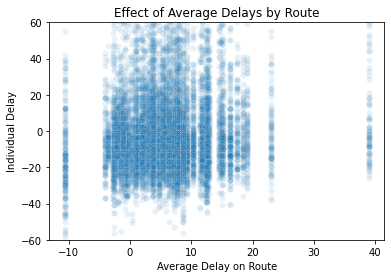

In [49]:
sns.scatterplot(
    data=airports,
    x='origin__dest_mean', y='arr_delay', alpha=0.1
)
plt.title('Effect of Average Delays by Route')
plt.xlabel('Average Delay on Route')
plt.ylabel('Individual Delay')
plt.ylim(-60, 60)
plt.savefig('airports.png', dpi=200)
plt.show()

### Time of Day

In [59]:
def add_hour_decimal(df, col):
    result = df.copy()
    result[col + '_hours'] = result[col] // 100 + (result[col] % 100) / 60
    return result

In [60]:
def add_all_hour_decimal(df):
    df = add_hour_decimal(df, 'crs_dep_time')
    df = add_hour_decimal(df, 'crs_arr_time')
    return df

In [61]:
flights_hour = add_all_hour_decimal(flights_clean)

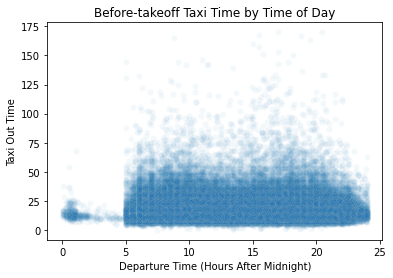

In [64]:
sns.scatterplot(data=flights_hour, x='crs_dep_time_hours', y='taxi_out', alpha=0.05)
plt.xlabel('Departure Time (Hours After Midnight)')
plt.ylabel('Taxi Out Time')
plt.title('Before-takeoff Taxi Time by Time of Day')
plt.savefig('time_taxi.png', dpi=200)
plt.show()

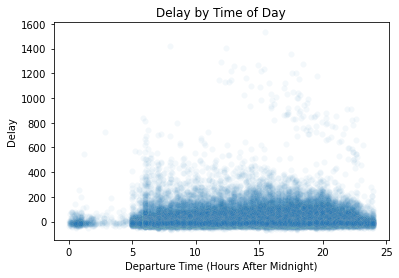

In [66]:
sns.scatterplot(data=flights_hour, x='crs_dep_time_hours', y='arr_delay', alpha=0.05)
plt.xlabel('Departure Time (Hours After Midnight)')
plt.ylabel('Delay')
plt.title('Delay by Time of Day')
plt.savefig('time_arr.png', dpi=200)
plt.show()

### Weather

In [35]:
weather = harness.make_weather_dummies(flights_clean, flights_clean)

In [36]:
weather.columns

Index(['fl_date_crs_dep_time', 'fl_date_crs_arr_time', 'fl_date',
       'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'cold_o', 'fog_o', 'hail_o', 'precipitation_o', 'rain_o',
       'snow_o', 'storm_o', 'severity_o', 'cold_d', 'fog_d', 'hail_d',
       'precipitation_d', 'rain_d', 'snow_d', 'storm_d', 'severity_d'],
      dtype='object')

In [37]:
def plot_weather(col, title):
    sns.violinplot(data=weather, x=col, y='arr_delay')
    plt.title(title)
    plt.xticks([0, 1, 2, 3], labels=['None', 'Mild', 'Moderate', 'Severe'])
    plt.xlabel('Severity')
    plt.ylabel('Delay')
    plt.ylim(-60, 60)

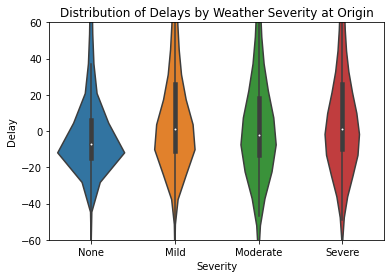

In [38]:
plot_weather('severity_o', 'Distribution of Delays by Weather Severity at Origin')
plt.show()

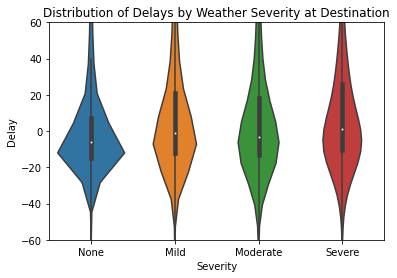

In [39]:
plot_weather('severity_d', 'Distribution of Delays by Weather Severity at Destination')
plt.savefig('weather.png', dpi=200)
plt.show()